# EXCHANGE RATE DYNAMICS: THE RELATIONSHIP BETWEEN DANISH INFLATION AND RELATIVE EXCHANGE RATES

## Introduction

### Research question

### Results

## Data analysis

To start with, we import the required modules, classes, and API to answer the research question.

In [1]:
# 1. We import the classic Python modules
import pandas as pd # We import Pandas to use DataFrames, which 
import numpy as np # We import Numerical Python
import matplotlib.pyplot as plt # We import MatPlotLib, which we use to show the plots of the data
import ipywidgets as widgets # We import widgets in Python, which we use to make interactive plots of the three different exchange rates
from ipywidgets import interact, widgets # We import the interactive plot class from widgets

# 2. We autoreload the modules, when the code is run
%load_ext autoreload
%autoreload 2

# 3. We import the user written modules
import dataproject

# 4. We setup the API
# a. If not downloaded before, run this code to download the API for Denmarks Statistics: %pip install git+https://github.com/alemartinello/dstapi

# b. We import the DstApi-class from the API
from dstapi import DstApi

### Read and clean data

#### The first dataset: Three exchange rates (EUR, USD, and CNY)

The first dataset is on the yearly annual relative rates of the Euro (EUR), the US Dollar (USD), and the Chinese Yuan Renminbi (CNY). 
We fetch the first dataset from Denmark Statistics using an API provided to us by alemartinello on GitHub. 

In [2]:
# 1. We access the dataset using the API and assign it to "dnvala"
dnvala = DstApi('DNVALA') # DNVALA is the name of the dataset on Denmark Statistics  

# 2. We show a summary of the metadata
# a. We store the tablesummary in the variable "tabsum" 
tabsum = dnvala.tablesummary(language='en') # We set the language to english, as we want the metadata being in english

# b. We display the summary of the metadata
display(tabsum)

Table DNVALA: Yearly exchange rates by currency, type, methodology and time
Last update: 2024-01-09T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VALUTA,57,EUR,Euro (Jan. 1999-),Z60,"Other currencies than EUR, USD, GBP, SEK, NOK ...",False
1,KURTYP,12,KBH,Exchange rates (DKK per 100 units of foreign c...,EFB,Important currencies contribution to changes i...,False
2,OPGOER,4,A,Annual average,Y,Annual growth rate,False
3,Tid,54,1970,1970,2023,2023,True


In [3]:
# 1. We print out a table containing the variable names followed by their units or values 
for variable in tabsum['variable name']: # We interate for every variable (column) in the tabsum-variable
    # a. For every variable in tabsum, we print out the variable with a colon
    print(variable+':')
    # b. We display the new summary 
    display(dnvala.variable_levels(variable, language='en')) # We set the language of the text to english 



VALUTA:


,id,text
0,EUR,Euro (Jan. 1999-)
1,USD,US Dollars (Jan. 1979-)
2,GBP,UK Pounds Sterling (Jan. 1980-)
3,SEK,Swedish Kronor (Jan. 1981-)
4,NOK,Norwegian Kroner (Jan. 1981-)
5,CHF,Swiss Francs (Jan. 1981-)
6,CAD,Canadian Dollars (Jan. 1981-)
7,JPY,Japanese Yen (Jan. 1981-)
8,AUD,Australian Dollars (Oct. 1991-)
9,NZD,New Zealand Dollars (Oct. 1991-)


KURTYP:


,id,text
0,KBH,Exchange rates (DKK per 100 units of foreign c...
1,TT3,"Forward premium, 3 months (DKK per 100 units o..."
2,TT6,"Forward premium, 6 months (DKK per 100 units o..."
3,INX,"Index (only nominal effective krone rate), ind..."
4,REK,Real effective krone rate based on consumer pr...
5,DKI,"Consumer prices in Denmark, index (1980=100)"
6,Z9I,"Weighted foreign consumer price index, index (..."
7,EUI,"Consumer price index for the euro area, index ..."
8,RET,Real effective krone rate based on hourly earn...
9,LOI,"Hourly earnings in manufacturing in Denmark, s..."


OPGOER:


,id,text
0,A,Annual average
1,E,End-year
2,B,Calculated
3,Y,Annual growth rate


Tid:


,id,text
0,1970,1970
1,1971,1971
2,1972,1972
3,1973,1973
4,1974,1974
5,1975,1975
6,1976,1976
7,1977,1977
8,1978,1978
9,1979,1979


In [4]:
params = dnvala._define_base_params(language='en')
params

{'table': 'dnvala',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VALUTA', 'values': ['*']},
  {'code': 'KURTYP', 'values': ['*']},
  {'code': 'OPGOER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [5]:
dnvala_true = dnvala.get_data(params=params)
params

{'table': 'dnvala',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VALUTA', 'values': ['*']},
  {'code': 'KURTYP', 'values': ['*']},
  {'code': 'OPGOER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [6]:
variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['EUR', 'USD', 'CNY']
variables[1]['values'] =['KBH']
variables[2]['values'] = ['A']
variables[3]['values'] = ['>2005<=2023']
params



{'table': 'dnvala',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VALUTA', 'values': ['EUR', 'USD', 'CNY']},
  {'code': 'KURTYP', 'values': ['KBH']},
  {'code': 'OPGOER', 'values': ['A']},
  {'code': 'Tid', 'values': ['>2005<=2023']}]}

We use the following dictionary definitions:

Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`

In [7]:
va_api = dnvala.get_data(params=params)
#rename variable
va_api.rename(columns = {'VALUTA': 'Exchange rate', 'KURTYP': 'Currency', 'OPGOER': 'Unit', 'TID': 'Year','INDHOLD': 'Value'}, inplace=True)

# Convert 'Year' to integer (assuming it's not already)
va_api['Year'] = va_api['Year'].astype(str)

# Convert 'Value' to float (assuming it's not already)
va_api['Value'] = va_api['Value'].astype(float)
data_types = va_api.dtypes
print(data_types)

va_api.head(6)

Exchange rate     object
Currency          object
Unit              object
Year              object
Value            float64
dtype: object


,Exchange rate,Currency,Unit,Year,Value
0,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,594.6975
1,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,74.5775
2,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,745.9100
3,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,544.5551
4,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,71.5582
5,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,745.0551


## The second dataset: Danish Inflation (Consumer Price Index)

In [8]:
CPI = 'Inflation.csv' # Open the file and have a look at it
pd.read_csv(CPI).head(5)

,Year,Value
0,2006,1.9
1,2007,1.7
2,2008,3.4
3,2009,1.3
4,2010,2.3


In [9]:
CPI_df = pd.read_csv(CPI)

CPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Value   18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 420.0 bytes


In [10]:
# Check the column names in the DataFrame
print(CPI_df.columns)

# Use strip() to remove leading or trailing whitespace from column names
CPI_df.columns = CPI_df.columns.str.strip()

# Rename the 'Value' column to 'Percent'
CPI_df.rename(columns={'Value': 'Inflation'}, inplace=True)

# Check the DataFrame after renaming
print(CPI_df.head(5))

Index(['Year', 'Value'], dtype='object')
   Year  Inflation
0  2006        1.9
1  2007        1.7
2  2008        3.4
3  2009        1.3
4  2010        2.3


In [11]:
# Check the data types of columns after conversion
print(CPI_df.dtypes)

Year           int64
Inflation    float64
dtype: object


In [12]:
inflation_describe = CPI_df['Inflation'].describe()

print("The descriptive statistics for inflation can be seen below:")
print(inflation_describe)

The descriptive statistics for inflation can be seen below:
count    18.000000
mean      1.888889
std       1.752272
min       0.300000
25%       0.800000
50%       1.500000
75%       2.375000
max       7.700000
Name: Inflation, dtype: float64


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

We make a **Static plot** for the three exchange rates:


The static plot for the three exchange rates can be seen below:


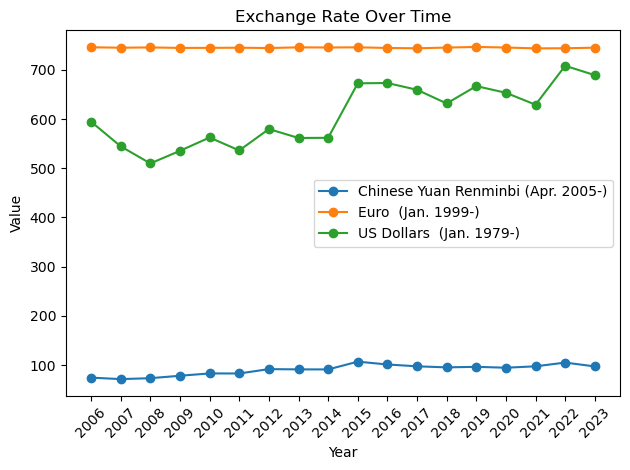

In [13]:
# 1. We sort the data by 'Year'
va_api_sorted = va_api.sort_values('Year')

# 2. We group the data by 'Exchange rate'
grouped_data = va_api_sorted.groupby('Exchange rate')

# 3. We create a figure and axis
fig, ax = plt.subplots()

# 4. Plot each group (exchange rate) as a separate line with markers
for name, group in grouped_data:
    ax.plot(group['Year'], group['Value'], label=name, marker='o', linestyle='-')

# 5. We set the labels and the title for the static plot
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Exchange Rate Over Time')

# 6. We rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# 7. We add a legend to the static plot
ax.legend()

# 8. We show the static plot
print("The static plot for the three exchange rates can be seen below:")
plt.tight_layout() # This adjusts the layout to prevent labels from being overlapped
plt.show() # This shows the static plot


The static plot for the three exchange rates makes it easy to see the differences in levels for the three exchange rates. We see that the highest exchange rate relative to Danish kroners is the Euro with around 740, which is also the most stable. This is because of the central parity currency with the Danish krone being fixed to the Euro. The second highest is the USD, which fluctuates a lot in the period, ranging from 500 to 700. At last, the CNY is the lowest with around 90-100 in the period. 

However, it is quite hard to see the yearly developments in the individual exchange rates. Therefore, it would be interesting to create an interactive plot, where we can change the exchange rate shown in the plot. This would highlight the year to year changes in each of the exchange rates.

**Interactive plot for the three exchange rates**:

In [14]:
# 1. We define a function to get the plot 
def plot_func(exchange_rate):
    # a. Filter the DataFrame for the selected exchange rate
    filtered_data = va_api[va_api['Exchange rate'] == exchange_rate]
    filtered_data_sorted = filtered_data.sort_values('Year')  # We sort the data by year
    # b. We plot the filtered and sorted data
    plt.figure(figsize=(15, 5)) # We adjust the size
    plt.plot(filtered_data_sorted['Year'], filtered_data_sorted['Value'], '-o') # Filters the data
    plt.xlabel('Year') # Adds a label on the x-axis
    plt.ylabel('Value') # Adds a label on the y-axis
    plt.title(f'Exchange Rate Over Time ({exchange_rate})')
    plt.grid(True) # Adds grids to the plot
    plt.show() # Shows the plot

# 2. Create the widget for selecting the specific exchange rates (EUR, USD, and CNY)
exchange_rate_widget = widgets.Dropdown(
    # a. We create the options (EUR, USD, and CNY) in the dropdown menu
    options=va_api['Exchange rate'].unique(),
    # b. We add a description to the dropdown menu, where we use FX Rate as a abbreviation for "Foreign Exchange Rate". This is because Exchange Rate is too long a word  
    description='FX Rate:' # FX = Foreign Exchange
)

# 3. We show the interactive plot
# a. We include a print statement, which describes where the plot can be found over the interactive plot
print("The interactive plot of the three exchange rates can be seen below:")

# b. We plot the interactive plot using the widget
interact(plot_func, exchange_rate=exchange_rate_widget) 

The interactive plot of the three exchange rates can be seen below:


interactive(children=(Dropdown(description='FX Rate:', options=('US Dollars  (Jan. 1979-)', 'Chinese Yuan Renm…

<function __main__.plot_func(exchange_rate)>

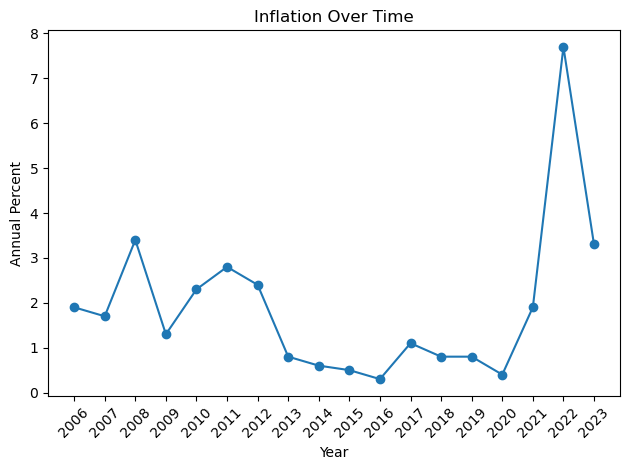

In [15]:
CPI_df['Year'] = CPI_df['Year'].astype(str)

# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(CPI_df['Year'], CPI_df['Inflation'], marker='o', linestyle='-')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Annual Percent')
ax.set_title('Inflation Over Time')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Merge data sets

In [16]:
# Check column names and data types
print(va_api.columns)
print(va_api.dtypes)
print(CPI_df.columns)
print(CPI_df.dtypes)

# Assuming column names are case-sensitive and data types are compatible
# Merge on 'Value' in va_api and 'Percent' in CPI_df
outer = pd.merge(va_api, CPI_df, on= 'Year', how='outer')

outer.head(5)

Index(['Exchange rate', 'Currency', 'Unit', 'Year', 'Value'], dtype='object')
Exchange rate     object
Currency          object
Unit              object
Year              object
Value            float64
dtype: object
Index(['Year', 'Inflation'], dtype='object')
Year          object
Inflation    float64
dtype: object


,Exchange rate,Currency,Unit,Year,Value,Inflation
0,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,594.6975,1.9
1,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,74.5775,1.9
2,Euro (Jan. 1999-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2006,745.9100,1.9
3,US Dollars (Jan. 1979-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,544.5551,1.7
4,Chinese Yuan Renminbi (Apr. 2005-),Exchange rates (DKK per 100 units of foreign c...,Annual average,2007,71.5582,1.7


Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

### Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

#### Plot for the Merged Data Set of Exchange Rate and Inflation

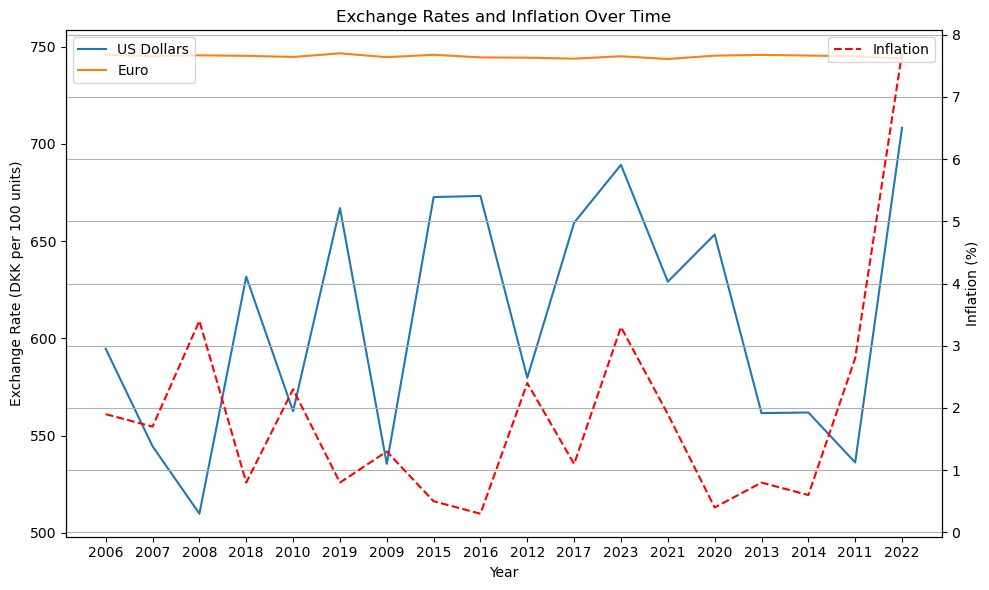

In [19]:
# Filter data in Exchange rate for US Dollars
usd_data = outer[outer['Exchange rate'].str.contains('US Dollars')]

# Filter data in Exchange rate for Chinese Yuan
#cny_data = outer[outer['Exchange rate'].str.contains('Chinese Yuan')] 
#Chinese Yuan is excluded in the figur to better compare the exchange rate and inflation

# Filter data in Exchange rate for Euro
eur_data = outer[outer['Exchange rate'].str.contains('Euro')]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot each exchange rate on the first y-axis
ax1.plot(usd_data['Year'], usd_data['Value'], label='US Dollars')
#ax1.plot(cny_data['Year'], cny_data['Value'], label='Chinese Yuan')
ax1.plot(eur_data['Year'], eur_data['Value'], label='Euro')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Exchange Rate (DKK per 100 units)')
ax1.set_title('Exchange Rates and Inflation Over Time')
ax1.legend(loc='upper left') 

# Creating a second y-axis for inflation
ax2 = ax1.twinx()
#Plot danish inflation using eur_data as it is the inflation is the same for all exchange rate
ax2.plot(eur_data['Year'], eur_data['Inflation'], linestyle='--', color='red', label='Inflation')
ax2.set_ylabel('Inflation (%)')
ax2.legend(loc='upper right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

### Conclusion

ADD CONCISE CONLUSION.